# 時系列解析1
https://momonoki2017.blogspot.com/2018/03/python6.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot') # グラフのデザイン変更（お好みで利用）
# plt.xkcd() # グラフのデザイン変更（お好みで利用）

In [2]:
import statsmodels.api as sm
sm.version.full_version

'0.9.0'

In [3]:
df = pd.read_csv('AirPassengers.csv')

In [4]:
df.head() # DataFrame先頭5行

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
passengers = pd.Series(df['#Passengers'], dtype='float') # ①
passengers.index = pd.to_datetime(df['Month']) # ②

In [6]:
print(passengers.index.dtype) # インデックス(日付) -> datetime型
print(len(passengers)) # データ件数 -> 144
passengers.head() # データ値(乗客数) -> float型

datetime64[ns]
144


Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

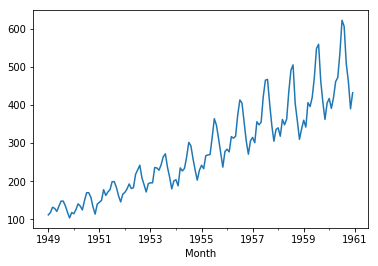

In [7]:
passengers.plot()

In [8]:
res = sm.tsa.seasonal_decompose(passengers)

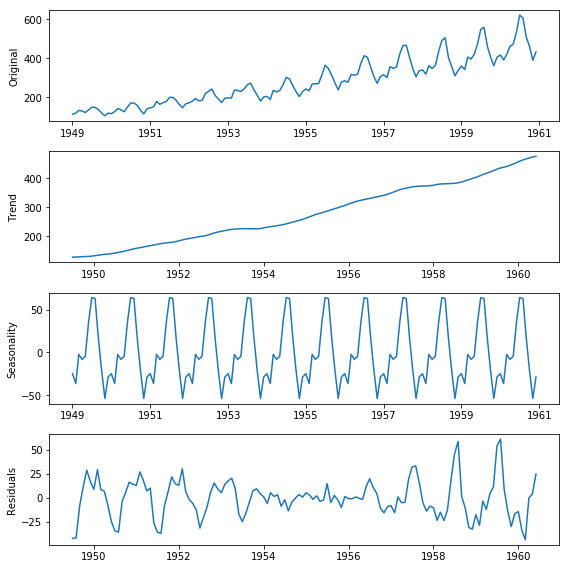

In [9]:

original = passengers # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

plt.figure(figsize=(8, 8)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

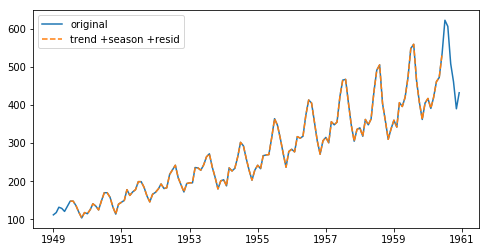

In [10]:
# res = sm.tsa.seasonal_decompose(passengers) # 解析結果は取得済み

original = passengers # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ
sum_three_data = trend + seasonal + residual # トレンド + 季節性 + 残差

plt.figure(figsize=(8, 4)) # グラフ描画枠作成、サイズ指定
plt.plot(original, label='original')
plt.plot(sum_three_data, label='trend +season +resid', linestyle='--')
plt.legend(loc='best') # 凡例表示

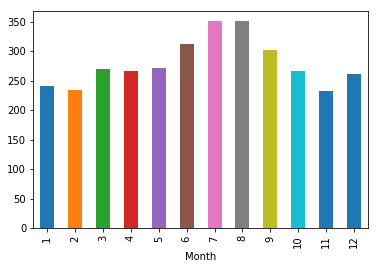

In [11]:
passengers.groupby(passengers.index.month).mean()
passengers_month_mean = passengers.groupby(passengers.index.month).mean()
passengers_month_mean.plot(kind='bar')

In [26]:
# 自己相関係数の出力
passengers_acf = sm.tsa.stattools.acf(passengers, nlags=40) #ラグ=40(デフォルト値)、省略可能
passengers_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

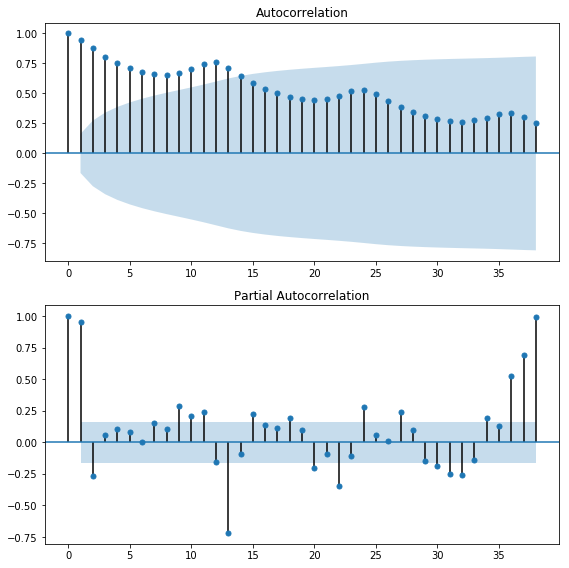

In [29]:
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(passengers, lags=38, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(passengers, lags=38, ax=ax2 ) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

In [19]:
passengers_diff = passengers - passengers.shift() # 階差系列データの作成
passengers_diff = passengers_diff.dropna() # Nanデータ削除
print(len(passengers_diff))
passengers_diff.head()

143


Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: #Passengers, dtype: float64

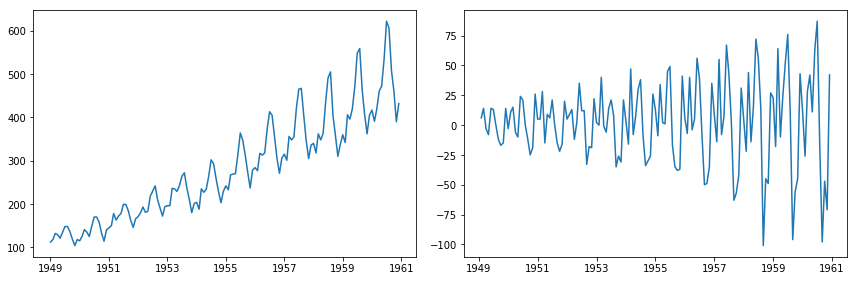

In [20]:
fig = plt.figure(figsize=(12, 4))

# 原型列のグラフ
ax1 = fig.add_subplot(121)
plt.plot(passengers)

# 階差系列のグラフ
ax2 = fig.add_subplot(122)
plt.plot(passengers_diff)

plt.tight_layout() # グラフ間スキマ調整

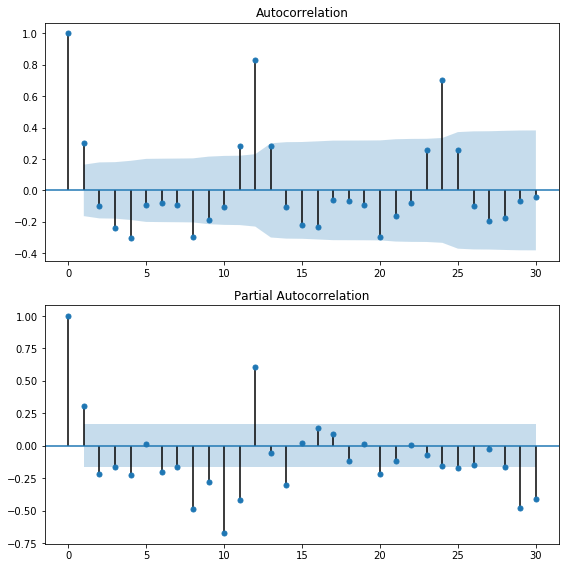

In [31]:
# 階差系列データでコレログラム作成
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(passengers_diff, lags=30, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(passengers_diff, lags=30, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

In [32]:
# ADF検定（原型列で確認だけ）
res_ctt = sm.tsa.stattools.adfuller(passengers, regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = sm.tsa.stattools.adfuller(passengers, regression="ct") # トレンド項あり（１次）、定数項あり
res_c = sm.tsa.stattools.adfuller(passengers, regression="c") # トレンド項なし、定数項あり
res_nc = sm.tsa.stattools.adfuller(passengers, regression="nc") # トレンド項なし、定数項なし
print(res_ctt)
print(res_ct)
print(res_c)
print(res_nc)

(-3.2336779226436216, 0.19594187397031948, 13, 130, {'1%': -4.462541514337733, '10%': -3.5817528944014563, '5%': -3.8786113536640876}, 988.8119525594961)
(-2.100781813844673, 0.5456589343124534, 13, 130, {'1%': -4.030152423759672, '10%': -3.1471816659080565, '5%': -3.444817634956759}, 993.2814778200581)
(0.815368879206047, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '10%': -2.578770059171598, '5%': -2.8840418343195267}, 996.6929308390189)
(2.3906017343512316, 0.9971802685434736, 13, 130, {'1%': -2.583153076923077, '10%': -1.614925969959035, '5%': -1.9432510546199364}, 997.0955704315447)


In [33]:
import warnings
warnings.filterwarnings('ignore') # 計算警告を非表示

# 自動ARMAパラメータ推定関数
res_selection = sm.tsa.arma_order_select_ic(passengers_diff, ic='aic', trend='nc')
res_selection

{'aic':              0            1            2
 0          NaN  1397.257791  1397.093436
 1  1401.852641  1412.615224  1385.496795
 2  1396.587654  1378.338024  1353.175681
 3  1395.021214  1379.614000  1351.138822
 4  1388.216680  1379.616584  1373.560615, 'aic_min_order': (3, 2)}

In [34]:
sarimax = sm.tsa.SARIMAX(passengers, 
                        order=(3, 1, 2),
                        seasonal_order=(1, 1, 1, 12),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

In [35]:
sarimax_resid = sarimax.resid # モデルの残差成分

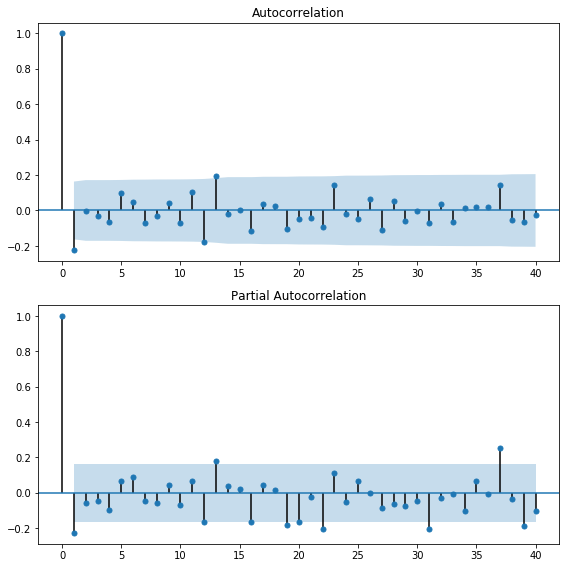

In [36]:
# モデル残差のコレログラム
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

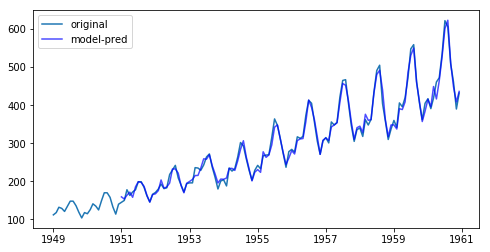

In [38]:
sarimax_pred = sarimax.predict('1951-01', '1960-12') 

plt.figure(figsize=(8, 4))

plt.plot(passengers, label="original")
plt.plot(sarimax_pred, c="b", label="model-pred", alpha=0.7)
plt.legend(loc='best')

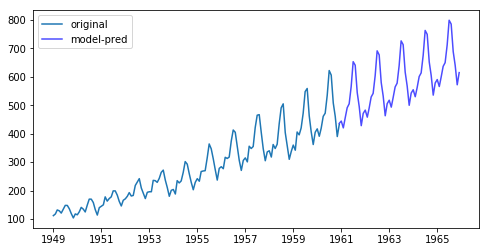

In [42]:
sarimax_pred = sarimax.predict('1960-12', '1965-12') 

plt.figure(figsize=(8, 4))

plt.plot(passengers, label="original")
plt.plot(sarimax_pred, c="b", label="model-pred", alpha=0.7)
plt.legend(loc='best')

In [40]:
# SARIMAパラメター最適化（総当たりチェック）
import warnings
warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）

# パラメータ範囲
# order(p, d, q)
min_p = 1; max_p = 3 # min_pは1以上を指定しないとエラー
min_d = 0; max_d = 1
min_q = 0; max_q = 3 

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 1
min_sd = 0; max_sd = 1
min_sq = 0; max_sq = 1

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
print("pattern:", test_pattern)

sfq = 12 # seasonal_order周期パラメータ
ts = passengers # 時系列データ

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in range(min_p, max_p + 1):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p, d, q), 
                            seasonal_order=(sp, sd, sq, sfq), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        test_results.iloc[num]["aic"] = sarima.aic
                        print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                        num = num + 1

# 結果（最小AiC）
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])

pattern: 192
0 / 191 order=(1,0,0), seasonal_order=(0,0,0) 1415.9068815931885
1 / 191 order=(1,0,0), seasonal_order=(0,0,1) 1205.390778617259
2 / 191 order=(1,0,0), seasonal_order=(0,1,0) 1029.977309170053
3 / 191 order=(1,0,0), seasonal_order=(0,1,1) 944.385492153311
4 / 191 order=(1,0,0), seasonal_order=(1,0,0) 1017.315549357131
5 / 191 order=(1,0,0), seasonal_order=(1,0,1) 1007.0272556175645
6 / 191 order=(1,0,0), seasonal_order=(1,1,0) 944.0441660825263
7 / 191 order=(1,0,0), seasonal_order=(1,1,1) 945.4400866779513
8 / 191 order=(1,0,1), seasonal_order=(0,0,0) 1390.4515018414882
9 / 191 order=(1,0,1), seasonal_order=(0,0,1) 1192.29496316195
10 / 191 order=(1,0,1), seasonal_order=(0,1,0) 1014.2547824623788
11 / 191 order=(1,0,1), seasonal_order=(0,1,1) 929.432970789217
12 / 191 order=(1,0,1), seasonal_order=(1,0,0) 1009.5891017291706
13 / 191 order=(1,0,1), seasonal_order=(1,0,1) 989.1764744428576
14 / 191 order=(1,0,1), seasonal_order=(1,1,0) 935.8163348217764
15 / 191 order=(1,0,

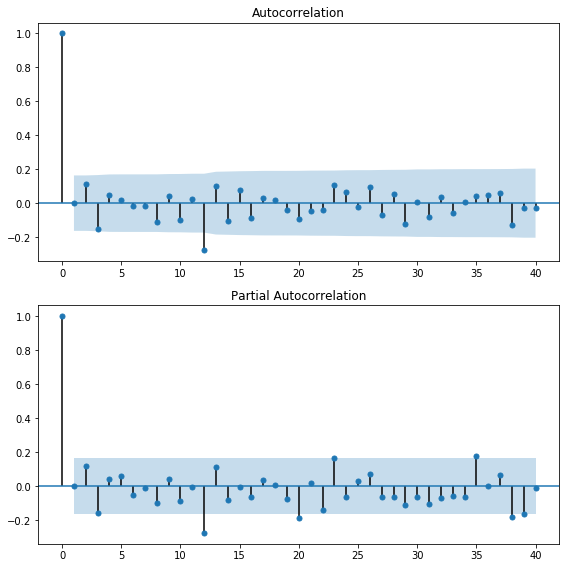

In [41]:
# SRIMAモデル（ちょっとだけパラメータ最適化・総当たりaicベストを適用）
sarimax_optimization = sm.tsa.SARIMAX(passengers, 
                        order=(3, 1, 3),
                        seasonal_order=(0, 1, 1, 12),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_optimization_resid = sarimax_optimization.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_optimization_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_optimization_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整